# Clasificación y regresión logística


## Teoría

Hablemos ahora del problema de clasificación. Es igual que el problema de regresión, salvo que los valores y que ahora queremos predecir toman sólo un pequeño número de valores discretos. Por ahora, nos centraremos en el problema de clasificación binaria en la que ${y}$ puede tomar sólo dos valores, 0 y 1. (La mayor parte de lo que decimos aquí también se generalizará al caso de clases múltiples.) Por ejemplo, si estamos tratando de construir un clasificador de spam para el correo electrónico, a continuación, $x{(i)}$ puede ser algunas características de una pieza de correo electrónico, y $y$ puede ser 1 si se trata de una pieza de correo spam, y 0 en caso contrario. El 0 también se denomina clase negativa y el 1 clase positiva, y a veces también se denotan con los símbolos "-" y "+". Dado $x^ {(i)}$ , la correspondiente $y^ {(i)}$ también se denomina etiqueta del
ejemplo de entrenamiento.

Podríamos abordar el problema de clasificación ignorando el hecho de que y tiene valores discretos, y utilizar nuestro antiguo algoritmo de regresión lineal para intentar predecir $y$ a partir de $x$. Sin embargo, es fácil construir ejemplos en los que este método
funciona muy mal. Intuitivamente, tampoco tiene sentido que $h_\theta (x)$ tome
valores mayores que 1 o menores que 0 cuando sabemos que y ∈ {0, 1}.
Para solucionar esto, vamos a cambiar la forma de nuestras hipótesis $h_\theta (x)$. Elegiremos:

$
h_\theta(x)=g(\theta ^ T x) = \frac{1}{1+e^ {-\theta^ T x}}
$


Where

$
g(z) = \frac{1}{1+e^ {-z}}
$

se denomina función logística o función sigmoidea. Gráfico de ejemplo:

<img src="img/1.png">

## Código
De manera general, lo que se busca en la regresión logística, es tener distintas clases o grupos de datos y separarlos para que cada grupo o conjunto, se separe o distinga de otros. Con esto, clasifico conjunto de datos pero por grupos. Por ejemplo, suponga que se tiene un grupo de estudiantes y lo que se requiere es que se separe por carreras o profesiones. Entonces, se creará un conjunto de datos de color rojo para los de ingeniería de sistemas, un color azul para los de ingeniería industrial y así sucesivamente.

## Gráfico de función logística

In [5]:
#Librerías
import numpy as np
import matplotlib.pyplot       as plt
%matplotlib inline

(120, 2)

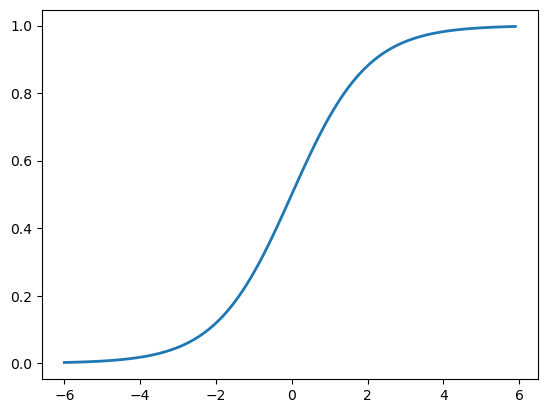

In [6]:
"""
Esta parte define una función llamada func_h_x que calcula la función de 
hipótesis para un modelo de regresión logística. El modelo de regresión logística se 
utiliza para clasificar los datos en dos o más categorías, y la función de hipótesis 
se utiliza para calcular la probabilidad de que un punto dado pertenezca a una de las categorías.

La función func_h_x toma dos argumentos: theta y x. theta es un vector de parámetros del 
modelo y x es una matriz de características de entrada. La función primero calcula un producto 
punto entre x y theta utilizando la función np.dot(). El resultado se almacena en la variable z.

Luego, la función utiliza la función sigmoide para calcular la probabilidad de que un punto dado 
pertenezca a una de las categorías. La función sigmoide está dada por la expresión 1/(1+exp(-z)). 
La función np.exp() se utiliza para calcular la exponencial de z y luego se suma 1 antes de 
dividir 1 por el resultado para calcular la función sigmoide. La probabilidad resultante se 
almacena en la variable score.

Finalmente, la función devuelve score, que es la probabilidad calculada de que un punto dado 
pertenezca a una de las categorías.

El resto del código es para graficar la función de hipótesis para el modelo de regresión logística. 
Primero, se crea un vector x que contiene valores de -6.0 a 6.0 en incrementos de 0.1. Luego, 
se define un vector theta de parámetros del modelo. La matriz de características x se aumenta 
con una columna de unos utilizando np.vstack() y luego se transpone utilizando .T. Esto se hace
para que pueda ser utilizado en la función func_h_x.

La función func_h_x se evalúa en x y el resultado se almacena en la variable h_x. 
Finalmente, se traza la función de hipótesis utilizando plt.plot(). El primer argumento 
de plt.plot() es la columna 0 de la matriz x y el segundo argumento es h_x aplanado. 
La función plt.plot() traza los valores de x en el eje x y los valores de h_x en el eje y. 
El resultado es una curva suave que representa la función de hipótesis del modelo de regresión 
logística.
"""

#Gráfica de una función logística
def func_h_x(theta,x):
    """Compute h_theta(x)"""
    z=np.dot(x,theta)
    score=1/(1+np.exp(-z))
    
    return score  

# Plot softmax curves
x = np.arange(-6.0, 6.0, 0.1)
#parametros
theta=np.array([1,0])
#vector de caracteristicas aumentado
x = np.vstack([x, np.ones_like(x)])
x=x.T
#evaluar la funcion
h_x=func_h_x(theta,x)
plt.plot(x[:,0], h_x.ravel(), linewidth=2)
x.shape

## Creación de datos artificiales
Datos para poder separar las 2 clases mediante una linea recta.

In [9]:
#create artificial data in 2-D

"""
Aquí se tiene una función llamada createData que genera puntos de manera artificial. 
La función toma un argumento opcional N, que es una lista de dos números enteros que indican cuántos 
puntos se generarán para dos grupos diferentes de datos. Si no se proporciona un valor para N, 
se usará [500, 500] como valor predeterminado. La función utiliza las bibliotecas NumPy para 
realizar cálculos matemáticos. En particular, usa la función np.random.randn() para generar números 
aleatorios a partir de una distribución normal estándar y luego los multiplica por los valores 
de desviación estándar especificados y los suma a los valores medios especificados en la matriz 
mvalues. Los puntos generados se almacenan en dos matrices NumPy separadas, X e Y. 
X es una matriz 2D que contiene los valores x e y de los puntos generados, mientras que Y es un 
vector 1D que indica a qué grupo pertenece cada punto generado. Los grupos se indican mediante 
un número entero, donde 0 representa el primer grupo y 1 representa el segundo grupo.
Finalmente, la función devuelve las matrices X e Y como una tupla.
"""

def createData(N=[500,500]):
    #generar puntos de forma artificial 
    #definir valor medio y desviacion
    mvalues=np.array([[0.7,3],[3,0.3]])
    std = [0.8,0.6]
    X=np.array([]) #vector vacio
    Y=np.array([]) #vector vacio

    for ii in range(len(N)):
        x= std[ii]*np.random.randn(N[ii],2)+mvalues[ii]
        if ii==0:
            X= x
        else:
            X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y

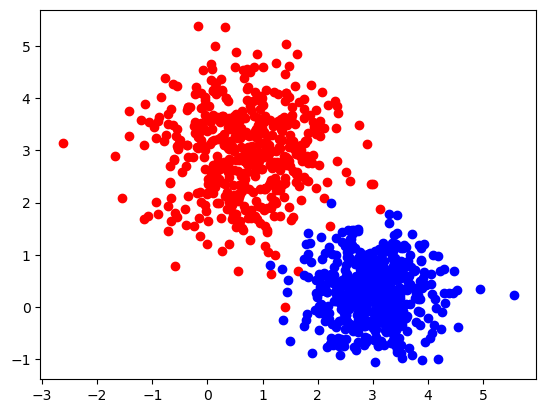

In [20]:
X,Y=createData()
#graficar
labels=np.unique(Y)

color='rbkg'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)

## Uso de la librería sklearn para predicción de regresión logística

La clase LogisticRegression es una implementación de la regresión logística en Python. 
La regresión logística es un algoritmo de aprendizaje supervisado utilizado para la clasificación 
binaria y la clasificación multiclase. La idea básica detrás de la regresión logística es modelar 
la probabilidad de pertenencia a una clase utilizando una función logística.

Una vez que se ha importado la clase LogisticRegression de sklearn, se puede instanciar un 
objeto de esta clase y ajustar el modelo a los datos utilizando el método ${fit()}$. La clase 
LogisticRegression proporciona muchos parámetros de ajuste para personalizar el modelo, 
como el parámetro de regularización C y el parámetro de convergencia ${tol}$.

La clase LogisticRegression también proporciona métodos para hacer predicciones con el 
modelo ajustado, como el método ${predict()}$ y el método ${predictproba()}$, que devuelve la 
probabilidad estimada de pertenencia a cada clase.

In [3]:
#Librería
from sklearn.linear_model import LogisticRegression

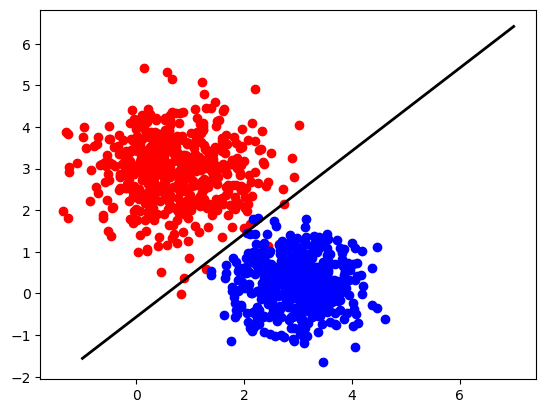

In [30]:
X,Y=createData()
#graficar
labels=np.unique(Y)
plt.figure()
color='rb'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)
#create a classifier
clf = LogisticRegression()
#train the classifier
clf.fit(X,Y)

#Plot parameters
theta0=clf.intercept_ 
theta =clf.coef_
xx = np.linspace(-1, 7, 10)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=2)

Predicción: 1


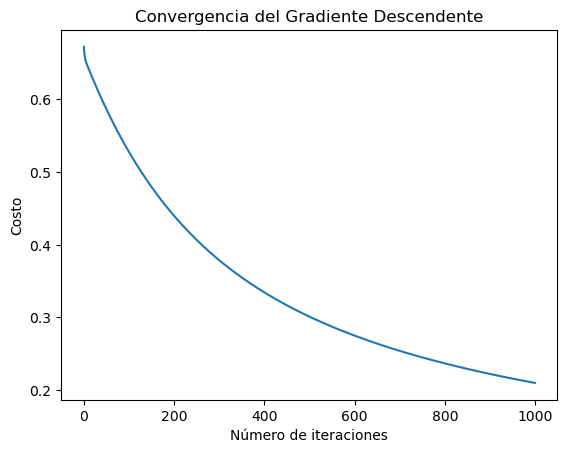

In [43]:
import numpy as np

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (log-verosimilitud)
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

# Gradiente descendente
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

# Datos de ejemplo
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Características (incluyendo el sesgo)
y = np.array([0, 0, 1, 1])  # Etiquetas

# Inicialización de parámetros
theta = np.zeros(X.shape[1])

# Hiperparámetros
alpha = 0.1
num_iterations = 1000

# Entrenamiento
theta_final, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Predicción
def predict(theta, X):
    h = sigmoid(np.dot(X, theta))
    return (h >= 0.5).astype(int)

# Ejemplo de predicción
new_data_point = np.array([1, 4.5])  # Nuevas características para predecir
prediction = predict(theta_final, new_data_point)
print("Predicción:", prediction)

# Visualización de la convergencia de la función de costo
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Convergencia del Gradiente Descendente")
plt.show()